In [1]:
import tributary as t

In [2]:
def myfoo(ds):
    for d in ds:
        vals = d.values()
        d['HIGH'] = max(vals)
        d['LOW'] = min(vals)
        d['MID'] = sum(vals)/len(vals)
    avgs = [x['MID'] for x in ds]
    ds[-1]['SMA'] = sum(avgs)/len(avgs)
    return ds[-1]

In [3]:
vals = t.Random(100)
w = t.Window(vals, size=10)
n = t.Apply(myfoo, w)
psp1 = t.Perspective(n, schema={"HIGH":float, "LOW": float, "MID": float, "SMA": float}, columns=['HIGH', 'LOW', 'MID', 'SMA'], plugin='y_line')
psp2 = t.Perspective(psp1, schema={"HIGH":float, "LOW": float, "MID": float, "SMA": float}, columns=['HIGH', 'LOW', 'MID', 'SMA'])

PerspectiveWidget(columns=['HIGH', 'LOW', 'MID', 'SMA'], plugin='y_line')

PerspectiveWidget(columns=['HIGH', 'LOW', 'MID', 'SMA'])

In [4]:
t.run(psp2)

<Task pending coro=<_run() running at /Users/theocean154/Programs/projects/tributary/tributary2/examples/tributary/reactive/__init__.py:10>>

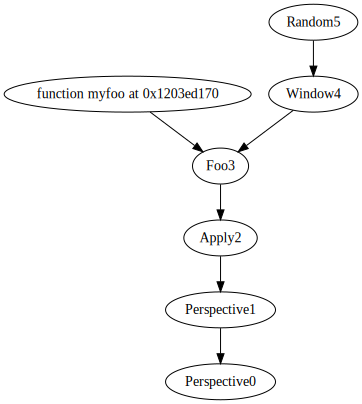

In [5]:
t.GraphViz(psp2, 'psp')